In [1]:
from chat2test import print_output

Set up your openai key

In [3]:
key = ""

rules for zero-shot prompt

In [4]:
rules = ["Rule One:  If y-axis (or x-axis) data come from a counter column or naturally integer column, make sure that axis  uses integer ticks. \n"
] 

example for few-shot prompt

In [5]:
example = """\n
    One-Shot Learning:

    Task Overview:
    Learn to generate a Python script that creates a bar chart from a DataFrame, ensuring to sort by the specified tag as requested.

    User Message:
    Request: Create a bar chart with the x-axis as 'Location' and the y-axis as the sum of 'Total_Passengers'. The chart should be sorted in descending order by the specified tag ('Location'). Use Python 3.9.12 and the DataFrame df from station.csv.

    DataFrame Variables:

        File: station.csv
        Columns:
            Station_ID (int64, numeric)
            Name (categorical: e.g., 'London Waterloo', 'London Victoria', etc.)
            Total_Passengers (float64, numeric)
            Location (categorical: 'London', 'Birmingham', 'Glasgow')
            Main_Services (categorical services)
            Number_of_Platforms (int64, numeric)

    Key Instruction:
    Always sort the DataFrame based on the tag explicitly mentioned in the request.

    Executed Code Example:

    python

    import pandas as pd
    import matplotlib.pyplot as plt

    # Load the data
    df = pd.read_csv('station.csv')

    # Group by 'Location' and sum 'Total_Passengers'
    grouped_df = df.groupby('Location')['Total_Passengers'].sum().reset_index()

    # Sort the DataFrame by the specified tag: 'Location' in descending order
    sorted_df = grouped_df.sort_values(by='Location', ascending=False)

    # Create the bar chart
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.bar(sorted_df['Location'], sorted_df['Total_Passengers'], color='skyblue')

    # Label the axes and set title
    ax.set_xlabel('Location')
    ax.set_ylabel('Sum of Total Passengers')
    ax.set_title('Total Passengers by Location')
    fig.suptitle('')  # Set fig suptitle as empty

    # Show the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    Expected Result:
    This script generates a bar chart displaying the total number of passengers for each location, sorted in descending order by the specified tag ('Location').

    Additional Note:
    In new requests, always identify and sort by the exact tag mentioned by the user, ensuring that sorting criteria are prioritized.
    """

Before few-shot prompt, the order is not sorted by Headquarter



import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

df = pd.read_csv('Manufacturers.csv')
df['Name'] = df['Name'].astype('category')
df['Headquarter'] = df['Headquarter'].astype('category')
df['Founder'] = df['Founder'].astype('category')

grouped_df = df.groupby('Headquarter')['Revenue'].mean().sort_values(ascending=False)

grouped_df.plot(kind='bar', ax=ax, color='skyblue')

ax.set_xlabel('Headquarter')
ax.set_ylabel('Average Revenue')
ax.set_title('Average Revenue by Headquarter')
plt.suptitle('')

plt.show()


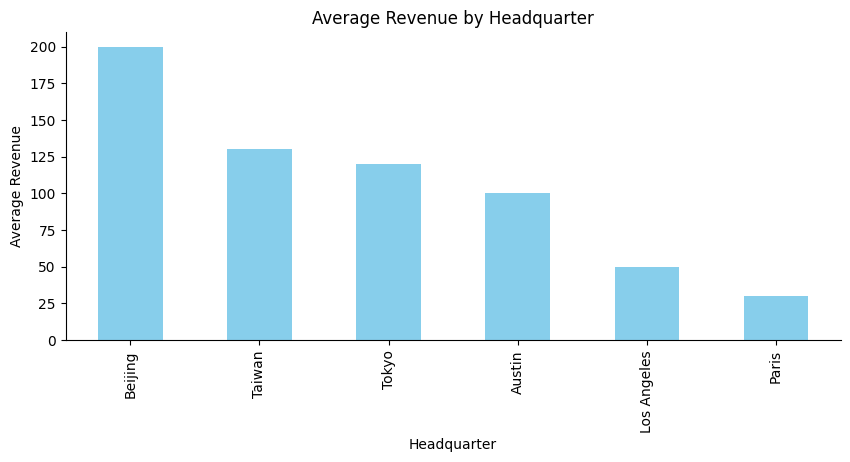

In [6]:
print_output("Manufacturers","For those records from the products and each product's manufacturer, show me about the distribution of headquarter and the average of revenue , and group by attribute headquarter in a bar chart, order Headquarter in descending order.",key)

After few-shot prompt, the order is correctly sorted by Headquarter



import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Manufacturers.csv')

grouped_df = df.groupby('Headquarter')['Revenue'].mean().reset_index()
sorted_df = grouped_df.sort_values(by='Headquarter', ascending=False)

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(sorted_df['Headquarter'], sorted_df['Revenue'], color='skyblue')

ax.set_xlabel('Headquarter')
ax.set_ylabel('Average Revenue')
ax.set_title('Average Revenue by Headquarter')
fig.suptitle('')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


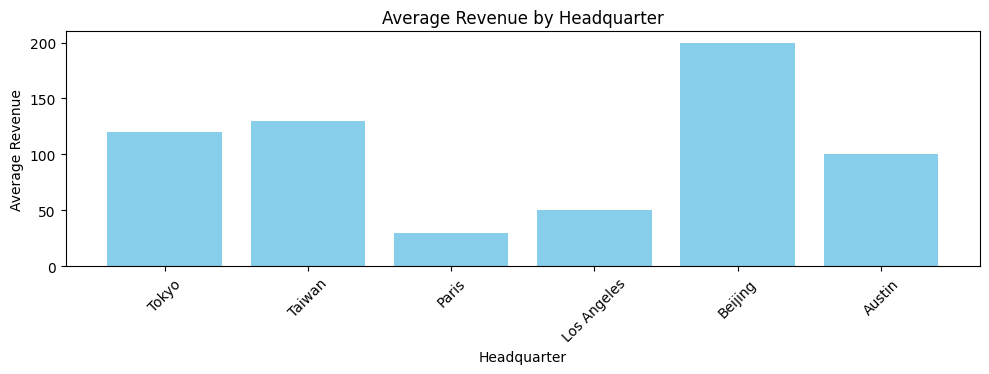

In [7]:
print_output("Manufacturers","For those records from the products and each product's manufacturer, show me about the distribution of headquarter and the average of revenue , and group by attribute headquarter in a bar chart, order Headquarter in descending order.",key,example=example)

Before zero-shot prompt, the y-axis is displayed in float-number data



import pandas as pd
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(10,4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 
df= pd.read_csv('school.csv')
denomination_counts = df['Denomination'].value_counts()
denomination_counts.sort_values(ascending=False).plot(kind='bar', ax=ax)
ax.set_title('Count of Schools by Denomination')
ax.set_xlabel('Denomination')
ax.set_ylabel('Number of Schools')
plt.suptitle('')
plt.show()


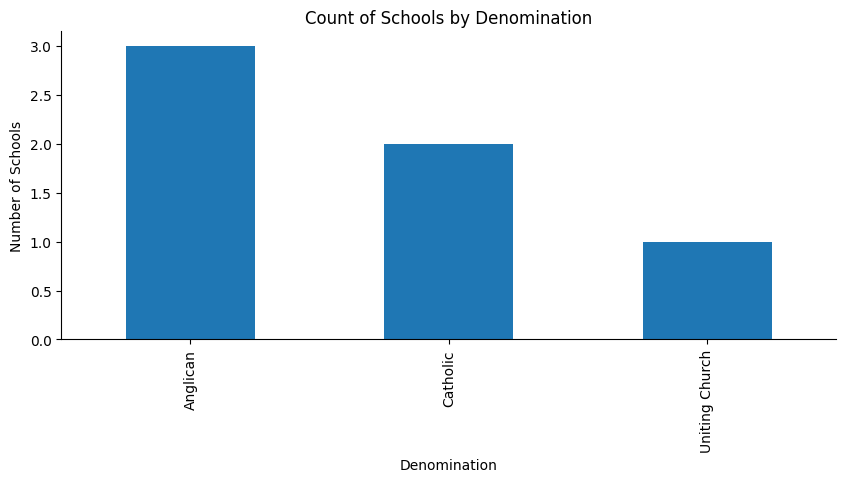

In [8]:
print_output("school","For each denomination, return the denomination and the count of schools with that denomination Visualize by bar chart, order X-axis in desc order.",key)

After zero-shot prompt, the y-axis is correctly displayed in integer data format



import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
df = pd.read_csv('school.csv')
denomination_counts = df['Denomination'].value_counts().sort_values(ascending=False)
denomination_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('Denomination')
ax.set_ylabel('Number of Schools')
ax.set_title('Count of Schools by Denomination')
ax.set_yticks(range(0, int(max(denomination_counts)) + 1, 1))
fig.suptitle('')
plt.tight_layout()
plt.show()


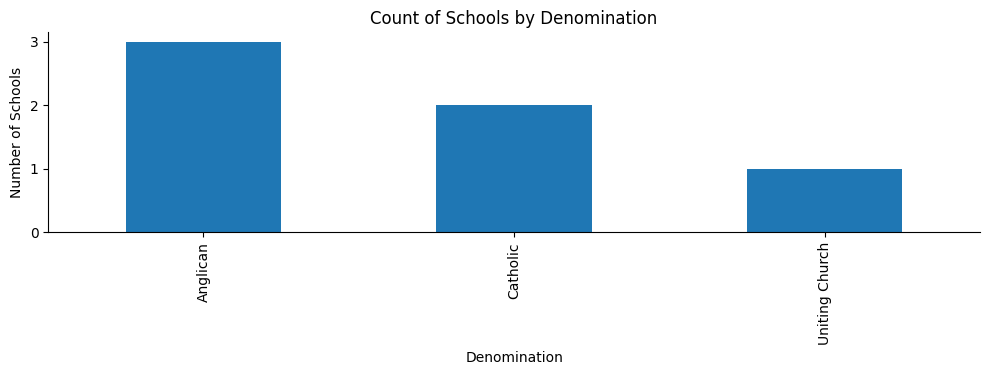

In [9]:
print_output("school","For each denomination, return the denomination and the count of schools with that denomination Visualize by bar chart, order X-axis in desc order.",key,rules=rules)